In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [26]:
# データの数を宣言
observations = 1000

# uniformメソッドを使ってランダムなデータを作成
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# column_stackを使って二つのベクトルを行列に
generated_inputs = np.column_stack((xs,zs))

# ノイズを足す
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [27]:
training_data = np.load('TF_intro.npz')

In [28]:
# 入力のサイズの定義
input_size = 2
# 出力のサイズの定義
output_size = 1

# 線形結合のモデルの作成
model = tf.keras.Sequential([
  # 'Dense'メソッドで線形結合を行う
  tf.keras.layers.Dense(output_size,
                        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                        bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                        )
  ])

# custom optimizerを使って学習率を0.2に設定(目的関数)
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# 'compile'で最適化アルゴリズムと損失関数を指定
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# データをモデルにフィットさせていく
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100


1000/1000 - 0s - loss: 27.7814
Epoch 2/100
1000/1000 - 0s - loss: 1.3178
Epoch 3/100
1000/1000 - 0s - loss: 0.4867
Epoch 4/100
1000/1000 - 0s - loss: 0.4256
Epoch 5/100
1000/1000 - 0s - loss: 0.3743
Epoch 6/100
1000/1000 - 0s - loss: 0.4081
Epoch 7/100
1000/1000 - 0s - loss: 0.3888
Epoch 8/100
1000/1000 - 0s - loss: 0.4166
Epoch 9/100
1000/1000 - 0s - loss: 0.3817
Epoch 10/100
1000/1000 - 0s - loss: 0.3965
Epoch 11/100
1000/1000 - 0s - loss: 0.3836
Epoch 12/100
1000/1000 - 0s - loss: 0.3850
Epoch 13/100
1000/1000 - 0s - loss: 0.3886
Epoch 14/100
1000/1000 - 0s - loss: 0.3758
Epoch 15/100
1000/1000 - 0s - loss: 0.3779
Epoch 16/100
1000/1000 - 0s - loss: 0.4117
Epoch 17/100
1000/1000 - 0s - loss: 0.4038
Epoch 18/100
1000/1000 - 0s - loss: 0.3788
Epoch 19/100
1000/1000 - 0s - loss: 0.4109
Epoch 20/100
1000/1000 - 0s - loss: 0.4018
Epoch 21/100
1000/1000 - 0s - loss: 0.3845
Epoch 22/100
1000/1000 - 0s - loss: 0.3928
Epoch 23/100
1000/1000 - 0s - loss: 0.3776
Epoch 24/100
1000/1000 - 0s - l

In [29]:
# 重みとバイアスを表示
model.layers[0].get_weights()

[array([[ 2.0495477],
        [-2.954378 ]], dtype=float32),
 array([4.993015], dtype=float32)]

In [30]:
# 変数に入れる
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0495477],
       [-2.954378 ]], dtype=float32)

In [31]:
# 変数に入れる
bias = model.layers[0].get_weights()[1]
bias

array([4.993015], dtype=float32)

In [ ]:
# 入力データに対する予測の値を表示
model.predict_on_batch(training_data['inputs']).round(1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/hiradekeishi/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/7_/5ly65s3j46zcgtgg9r0sjm940000gn/T/ipykernel_81102/2832864636.py", line 2, in <module>
    model.predict_on_batch(training_data['inputs']).round(1)
AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'round'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/hiradekeishi/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/hiradekeishi/opt

In [32]:
# ターゲットを表示
training_data['targets'].round(1)

array([[ 37.3],
       [ 24.9],
       [-14.1],
       [ 23.1],
       [ 11.7],
       [-16. ],
       [  0.1],
       [ -7.2],
       [-25.1],
       [ 28.9],
       [-30.4],
       [ 47.1],
       [ 18.9],
       [ -4.1],
       [-15.2],
       [ 26. ],
       [ 41.2],
       [ 26.5],
       [ 35.7],
       [ 33.2],
       [ 40.8],
       [ 44.5],
       [-21.1],
       [ -6.2],
       [-31.7],
       [ 12.7],
       [ 13.9],
       [ -1.8],
       [  4.9],
       [ 20.5],
       [ -0.1],
       [ 36.2],
       [-15.6],
       [ -3.6],
       [ 24.6],
       [ 36.3],
       [  1.8],
       [  2.8],
       [-32.8],
       [ 29.5],
       [ 18.3],
       [ 20.2],
       [ 24.4],
       [ -6.6],
       [ -9.6],
       [  5.2],
       [  6.6],
       [ 21.5],
       [ -5.9],
       [ 22.1],
       [ 15.5],
       [ 11.7],
       [ 28.4],
       [  5.9],
       [-10.5],
       [  9.3],
       [-29.3],
       [-29. ],
       [  0.4],
       [ 30.8],
       [ 41.9],
       [ 18. ],
       [

ERROR! Session/line number was not unique in database. History logging moved to new session 40


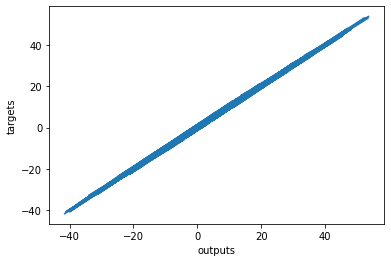

In [33]:
# 散布図を表示
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()